# <center> Econ 390: Computational Economics (with Python) </center>
## <center> Dr. Yaroslav Rosokha</center>

# Advanced Programming Techniques

## Contents

- [Useful Functions](#useful)
    - [range](#range)
    - [enumerate](#enumerate)
    - [zip](#zip)
    - [map](#map)
    - [list comprehension](#list-comprehension)
    - [lambda functions](#lambda)
- [Arrays](#arrays)
    - [accessing data](#accessing-data)
    - [algebraic operations](#algebraic-operations)
    - [useful functions](#useful-functions-numpy)
    - [mutability](#mutability)
- [Recursion](#recursion)
    - [Three Laws of Recursion](#3-laws)
- [Introduction to Object Oriented Programming](#oop)
- [Timing and Profiling](#timing)

## Resources

- [Numpy Arrays](https://python-programming.quantecon.org/numpy.html#NumPy)
- [Recursion](https://runestone.academy/runestone/books/published/pythonds/Recursion/toctree.html)
    - [Recursive Function Calls](https://python-programming.quantecon.org/python_advanced_features.html#Recursive-Function-Calls)
- [Object Oriented Programming](https://python-programming.quantecon.org/oop_intro.html) 
    - [Classes](https://python-programming.quantecon.org/python_oop.html#OOP-II:-Building-Classes)
- [Writing Good Code](https://python-programming.quantecon.org/writing_good_code.html)

<a id="useful"></a>
# Useful Functions

<a id="range"></a>
## [range](https://docs.python.org/3.3/library/stdtypes.html?highlight=range#range) 
Generate a sequence of numbers

In [1]:
range?

In [2]:
#previously we learned how to use a list with a for loop
items = [1,2,3,4,5]
for i in items:
    print(i)

1
2
3
4
5


In [3]:
for i in range(5):
    print(i)

0
1
2
3
4


In [4]:
for i in range(3,8):
    print(i)

3
4
5
6
7


In [5]:
for i in range(3,8,2):
    print(i)

3
5
7


In [6]:
print(list(range(5)))

[0, 1, 2, 3, 4]


<a id="enumerate"></a>
## [enumerate](https://book.pythontips.com/en/latest/enumerate.html) 
Return an enumerated sequence (index,value)

In [7]:
someList = ["Jan","Feb","Mar"]
for i,m in enumerate(someList):
    print(i,m)

0 Jan
1 Feb
2 Mar


In [8]:
list(enumerate(someList))

[(0, 'Jan'), (1, 'Feb'), (2, 'Mar')]

In [9]:
print(list(enumerate(someList)))

[(0, 'Jan'), (1, 'Feb'), (2, 'Mar')]


In [10]:
paidInfo={"Alice":10.5,"Bob":7.8,"Chris":15.0} #some data
for index, val in enumerate(paidInfo):
    print("index=",index)
    print("value=",val)

index= 0
value= Alice
index= 1
value= Bob
index= 2
value= Chris


<a id="zip"></a>
## [zip](https://docs.python.org/3.3/library/functions.html#zip) 
Return a list of tuples where the i-th tuple contains the i-th element from each of the argument sequences

In [11]:
pairedInfo = list(zip(paidInfo.values(),someList,[1,2,3]))
print(pairedInfo)

[(10.5, 'Jan', 1), (7.8, 'Feb', 2), (15.0, 'Mar', 3)]


In [12]:
#zip() in conjuction with * can be used to unzip a list
x1, y1, z1 = list(zip(*pairedInfo))
print("x1=",x1,"y1=",y1,"z1=",z1)

x1= (10.5, 7.8, 15.0) y1= ('Jan', 'Feb', 'Mar') z1= (1, 2, 3)


<a id="map"></a>
## [map](https://docs.python.org/3.3/library/functions.html#map) 
Apply a function to every item of iterable and return a list of the result

In [13]:
def mySquare(x):
    return x**2

In [14]:
x_values = [1,2,3,4,5,6,7,8,9,10]
print(list(map(mySquare,x_values)))

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [15]:
res = []
for x in x_values:
    res.append(x**2)
print(res)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


In [16]:
from taxes import in_tax
myOutput3=list(map(in_tax,paidInfo.values()))
print(myOutput3)

[0.7350000000000001, 0.546, 1.05]


<a id="list-comprehension"></a>
## [List and Dictionary Comprehension](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) 
"Pythonic" way of creating a list (or dictionary) in one line from other lists (or dictionaries)

In [17]:
data = [1,2,3,4,5,6]
#Create a new list
data_sq = [x**2 for x in data]
print(data_sq)

[1, 4, 9, 16, 25, 36]


In [18]:
paidInfo={"alice":10.5,"Bob":7.8,"chris":15.0}
#Create a new list myTaxList2
myTaxList2=[in_tax(x) for x in paidInfo.values()]
print(myTaxList2)

[0.7350000000000001, 0.546, 1.05]


In [19]:
myNamesList=[n.upper() for n in paidInfo.keys()]
print(myNamesList)

['ALICE', 'BOB', 'CHRIS']


In [20]:
myNewPaidInfo={n.upper():in_tax(paidInfo[n]) for n in paidInfo.keys()}
print(myNewPaidInfo)

{'ALICE': 0.7350000000000001, 'BOB': 0.546, 'CHRIS': 1.05}


<a id="arrays"></a>
# Arrays

> [**array**](https://numpy.org/doc/stable/reference/arrays.ndarray.html) is collection of objects of the same type and size (usually stored in contiguous memory)

Why arrays? 
 - Very fast with vectorized operations, linear algebra routines, applying a fixed function to an entire array
 - Loops in Python carry significant overhead.
     - Loops in C and Fortran are much faster because they carry data type information that can be used for code optimization


*Aside: difference between lists, arrays, dictionaries

## [Numpy](https://numpy.org/doc/stable/user/quickstart.html)
Numpy is a library that implements array processing in Python

Numpy is one of the most commonly used libraries for data analysis in Python. Almost every data analysis or machine learning package for Python uses Numpy is some way.

Nympy Used in
 - Academia
 - Finance
 - Industry
Pros
 - Fast
 - Stable
 - Good Documentation

In [21]:
import numpy as np #Start by importing Numpy

In [22]:
#Create four arrays
a = np.zeros((3,3))
c = np.linspace(2,4,11)
d = np.array([[10,5],['a','5'],10])
e = np.ones((3,4,4))

print("a=",a)
print("c=",c)
print("d=",d)
print("e=",e)

a= [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
c= [2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8 4. ]
d= [list([10, 5]) list(['a', '5']) 10]
e= [[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


In [23]:
x=np.empty((5,5))
print(x)

[[6.23042070e-307 4.67296746e-307 1.69121096e-306 1.60218491e-306
  1.89146896e-307]
 [7.56571288e-307 4.00544531e-307 1.11261095e-306 3.56043054e-307
  1.37961641e-306]
 [2.22518251e-306 1.33511969e-306 1.69118108e-306 8.06632139e-308
  1.20160711e-306]
 [1.69119330e-306 1.29062229e-306 1.42417222e-306 1.33512648e-306
  7.56596412e-307]
 [9.34604358e-307 8.90104239e-307 1.42410974e-306 1.42404727e-306
  2.33419537e-312]]


<a id="accessing-data"></a>
## Accessing Data

In [24]:
z = np.array([[1,2],[3,4]])
print(z)
print(z.shape)

[[1 2]
 [3 4]]
(2, 2)


In [25]:
print(z[1,0]) #Remember zero-based indexing

3


In [26]:
print(z[1,:]) #Slicing Example

[3 4]


In [92]:
z = np.linspace(2,4,5)
print(z)

print(z[[0,1,2,2,3,4,1]])

[2.  2.5 3.  3.5 4. ]
[2.  2.5 3.  3.  3.5 4.  2.5]


In [93]:
d = [1,2,4,1,1,1,1]
z[d]

array([2.5, 3. , 4. , 2.5, 2.5, 2.5, 2.5])

In [28]:
x=np.array([1,2,4])
print(z[x])

[2.5 3.  4. ]


In [36]:
d=np.array([0,1,0,1,0],dtype=bool)
print(d)
print(z[d])

[False  True False  True False]
[2.5 3.5]


##### Practice Question
In the code below, what is z[d]?

In [43]:
z=np.linspace(2,4,5)
d=np.array([1,2,3])
print(d)
print(z[d])

[1 2 3]
[2.5 3.  3.5]


<a id="useful-functions-numpy"></a>
## Useful functions in NumPy

In [45]:
x = np.arange(0,10,2)
y = np.arange(5)
print("x=",x)
print("y=",y)
print(x.shape) #Shape returns dimentions of the array

x= [0 2 4 6 8]
y= [0 1 2 3 4]
(5,)


In [47]:
print(x*y)

[ 0  2  8 18 32]


In [49]:
m=np.vstack([x,y])
print(m)
print(m.shape)

[[0 2 4 6 8]
 [0 1 2 3 4]]
(2, 5)


In [50]:
xy=np.hstack([x,y])
print(xy)
print(xy.shape)

[0 2 4 6 8 0 1 2 3 4]
(10,)


## Available Functions

Lots and lots... 

Few simple examples

In [55]:
myList2=np.array([2,4,6,9,2,23])
print("sum=",np.sum(myList2))
print("mean=",np.mean(myList2))
print("median=",np.median(myList2))
print("std.dev.=",np.std(myList2))

sum= 46
mean= 7.666666666666667
median= 5.0
std.dev.= 7.272474743090476


In [61]:
np.median(myList2)

5.0

In [62]:
temp = np.array([1,2,3,4,5,6])
print(temp.mean())

3.5


##### Practice Problem

Suppose N numbers are equally distributed on the interval from 2 to 5. Write a function to calculate the sum of these numbers.


In [68]:
N = 5
numbers = np.linspace(2,5,N)
print(numbers)
print("Sum:",numbers.sum())

[2.   2.75 3.5  4.25 5.  ]
Sum: 17.5


In [85]:
def sumEqD(N):
    print("This is my function called sumEqD()..")
    return np.linspace(2,5,N).sum()

In [86]:
sumEqD(10)

This is my function called sumEqD()..


35.0

In [74]:
f = lambda N: np.linspace(2,5,N).sum()

In [82]:
print(np.linspace(2,5,100))
print(np.linspace(2,5,5))

[2.         2.03030303 2.06060606 2.09090909 2.12121212 2.15151515
 2.18181818 2.21212121 2.24242424 2.27272727 2.3030303  2.33333333
 2.36363636 2.39393939 2.42424242 2.45454545 2.48484848 2.51515152
 2.54545455 2.57575758 2.60606061 2.63636364 2.66666667 2.6969697
 2.72727273 2.75757576 2.78787879 2.81818182 2.84848485 2.87878788
 2.90909091 2.93939394 2.96969697 3.         3.03030303 3.06060606
 3.09090909 3.12121212 3.15151515 3.18181818 3.21212121 3.24242424
 3.27272727 3.3030303  3.33333333 3.36363636 3.39393939 3.42424242
 3.45454545 3.48484848 3.51515152 3.54545455 3.57575758 3.60606061
 3.63636364 3.66666667 3.6969697  3.72727273 3.75757576 3.78787879
 3.81818182 3.84848485 3.87878788 3.90909091 3.93939394 3.96969697
 4.         4.03030303 4.06060606 4.09090909 4.12121212 4.15151515
 4.18181818 4.21212121 4.24242424 4.27272727 4.3030303  4.33333333
 4.36363636 4.39393939 4.42424242 4.45454545 4.48484848 4.51515152
 4.54545455 4.57575758 4.60606061 4.63636364 4.66666667 4.69696

In [75]:
f(5)

17.5

<a id="algebraic-operations"></a>
## Algebraic Operations

In [98]:
a = np.array([1,2.,3,4])
b = np.array([5,6,7,8])

In [99]:
print("a+b:",a+b)
print("a*b:",a*b)
print("a+10:",a+10)
print("a*10:",a*10)

a+b: [ 6.  8. 10. 12.]
a*b: [ 5. 12. 21. 32.]
a+10: [11. 12. 13. 14.]
a*10: [10. 20. 30. 40.]


In [100]:
A = np.ones((2,2))
B = np.ones((2,2))

In [103]:
print("A*10:")
print(A*10)
print("A+B:")
print(A+B)
print("A+10:")
print(A+10)
print("A*B:")
print(A*B)

A*10:
[[10. 10.]
 [10. 10.]]
A+B:
[[2. 2.]
 [2. 2.]]
A+10:
[[11. 11.]
 [11. 11.]]
A*B:
[[1. 1.]
 [1. 1.]]


##### Practice Problem

Suppose you have a random variable X that takes on values {1,2,3} each with equal probability, and a random variable Y that takes on values {4,5,6} with probabilities {.2,.3,.5}.

- What is the probability that simulteneously X>1 and Y>4?
- What is the expected value of X+Y?
- What is the expected value of X+Y, given that X>1?

In [108]:
X = np.array([1,2,3])
probX = np.ones(3)/3
Y = np.array([4,5,6])
probY = np.array([.2,.3,.5])
print(X,probX,Y,probY)

[1 2 3] [0.33333333 0.33333333 0.33333333] [4 5 6] [0.2 0.3 0.5]


In [112]:
condition1 = X>1
print(condition1)
probX[condition1]

[False  True  True]


array([0.33333333, 0.33333333])

In [143]:
probX[np.array([False,True,False],dtype=bool)]

array([0.33333333])

In [144]:
condition1 = X>1
print(X[condition1])
print(probX[condition1])
X[condition1] * probX[condition1]

[2 3]
[0.33333333 0.33333333]


array([0.66666667, 1.        ])

In [146]:
condition2 = Y>4
print(condition2)
probY[condition2]

[False  True  True]


array([0.3, 0.5])

In [120]:
probXgt1 = probX[1:].sum()
print(probXgt1)
probYgt4 = probY[1:].sum()
print(probYgt4)
probXgt1*probYgt4

0.6666666666666666
0.8


0.5333333333333333

In [153]:
(X*probX).sum() + (Y*probY).sum()

7.3

In [129]:
(X*probX).sum()

2.0

In [124]:
print(Y,probY,Y*probY)


[4 5 6] [0.2 0.3 0.5] [0.8 1.5 3. ]


5.3

In [132]:
X[1:].mean()

2.5

In [149]:
#What is the expected value of Y given that Y>4
(Y[1:]*probY[1:]/probY[1:].sum()).sum()

5.625

In [150]:
relevantY = Y[1:]
relevantProbsY = probY[1:]
probabilites = relevantProbsY/relevantProbsY.sum()
(relevantY*probabilites).sum()

5.625

In [147]:
Y

array([4, 5, 6])

In [148]:
probY

array([0.2, 0.3, 0.5])

<a id="mutability"></a>
## Be aware that Numpy Arrays are *Mutable*

In [1]:
import numpy as np

In [2]:
a = np.array([42,44])
b = a
b[0]=0
print(a)
# can use copy library to prevent this
import copy
a = np.array([42,44])
c = copy.deepcopy(a)
c[0]=1
print(a)

[ 0 44]
[42 44]


<a id="recursion"></a>
# Recursion

> **Recursion** -- a method of solving problems that involves breaking a problem down into smaller and smaller sub-problems usually involves calling a function itself. 

*Benefit*: May provide easier solutions to otherwise difficult programs.

*Drawback*: Every time a function calls itself it uses some memory.

Aside: By default python stops the function calls after a depth of 1000 calls. You can modify the number of recursive calls using sys library *sys.setrecursionlimit()*

In [ ]:
def sum_list(data):
    theSum = 0
    for x in data:
        theSum = theSum + x
    return theSum

In [ ]:
def sum_list_r(data):
    if len(data) == 1:
        return data[0]
    else:
        return data[0]+sum_list_r(data[1:])

<a id="3-laws"></a>
## The Three Laws of Recursion

> 1. A recursive algorithm must have a *base case*
2. A recursive algorithm must change its state and move toward the base case
3. A recursive algorithm must call itself, recursively

*Notes*:
- *Base case* is a problem that can be solved directly. Base case allows the algorithm to stop recursing. 
- A change of state means that some data that the algorithm is using is modified (usually data gets smaller in some way)

In [5]:
def sumOfNRec (someList):
    print(someList)
    if len(someList) == 1: #base case
        print("-> Base Case: list",someList)
        return someList[0]
    else:
        print("split into",someList[0],"+","sumOfNRec of",someList[1:])
        #                  recursive call (reduced problem)   
        return someList[0]+sumOfNRec(someList[1:])

In [6]:
#test
sumOfNRec([1,2,3,4,5])

[1, 2, 3, 4, 5]
split into 1 + sumOfNRec of [2, 3, 4, 5]
[2, 3, 4, 5]
split into 2 + sumOfNRec of [3, 4, 5]
[3, 4, 5]
split into 3 + sumOfNRec of [4, 5]
[4, 5]
split into 4 + sumOfNRec of [5]
[5]
-> Base Case: list [5]


15

## Direct and Indirect Recursive Calls

> **direct recursive** function if calls itself

> **indirect recursive** function calls another function and that function may call the initial function directly or indirectly

In [11]:
def isOdd(N):
    print("Checking if ",N," is odd...")
    if N==0: #base case
        return False
    else: #recursive call
        return isEven(N-1) #<-- indirect recursion
    
def isEven(N):
    print("Checking if ",N," is even...")
    if N==0: #base case
        return True
    else: #recursive call
        return isOdd(N-1) #<-- indirect recursion

In [12]:
#test
isEven(5)

Checking if  5  is even...
Checking if  4  is odd...
Checking if  3  is even...
Checking if  2  is odd...
Checking if  1  is even...
Checking if  0  is odd...


False

##### Practice Problem

Write a recursive function to calculate factorial of a positive integer

In [16]:
def factorial(N):
    '''A recursive function to calculate factorial of a positive integer N'''
    #Base case
    print("calculating factorial of N=",N)
    if N == 1:
        print("-> Base case: factorial(1)=1")
        return 1
    #Recursive call
    print("-Break the problem into ",N,"*factorial(",N-1,")")
    return N*factorial(N-1)

In [17]:
#test
factorial(6)

calculating factorial of N= 6
-Break the problem into  6 *factorial( 5 )
calculating factorial of N= 5
-Break the problem into  5 *factorial( 4 )
calculating factorial of N= 4
-Break the problem into  4 *factorial( 3 )
calculating factorial of N= 3
-Break the problem into  3 *factorial( 2 )
calculating factorial of N= 2
-Break the problem into  2 *factorial( 1 )
calculating factorial of N= 1
-> Base case: factorial(1)=1


720

##### Practice Problem

Write a recursive function to convert an integer to a string

In [28]:
def toDecStr(N):
    '''A recursive function to convert a positive integer N into a sring'''
    
    stringOfDigits="0123456789" # <-- hint
    print("evaluating toDecStr(",N,")...")
    #Base case
    if N<10:
        print("---> Base case: ",stringOfDigits[N])
        return stringOfDigits[N]
    
    #Break down the problem + Recursive call
    
    remainder = N % 10
    intDivision = N // 10
    print("Break down into toDecStr(",intDivision,") + ",stringOfDigits[remainder])
    
    return toDecStr(intDivision) + stringOfDigits[remainder]
    


In [29]:
toDecStr(157)

evaluating toDecStr( 157 )...
Break down into toDecStr( 15 ) +  7
evaluating toDecStr( 15 )...
Break down into toDecStr( 1 ) +  5
evaluating toDecStr( 1 )...
---> Base case:  1


'157'

In [23]:
157 % 10

7

In [22]:
157 // 10

15

In [19]:
"0123456789"[4]

'4'

In [ ]:
#test
toDecStr(15)

# Introduction to Object Oriented Programming

### <center><font color='red'>In Python Everything is an Object</font></center>

## What is an object?

> [**object**](https://python-programming.quantecon.org/oop_intro.html#Objects) -- logical grouping of data (attributes) and functions (methods)

Access methods and attributes via '.'

## How to create an object?

> [**class**](https://python-programming.quantecon.org/python_oop.html#Defining-Your-Own-Classes) -- a user-defined template for creating an object

Keyword *class* is used to define a class. Class names should follow the *UpperCaseCamelCase* convention.



In [43]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 

In [35]:
class State:

    def __init__(self, name, pop):
        print("Initialize new object with name=",name,"and population=",pop)
        self.name = name
        self.population = pop

        #supply function parameters
        self.supply_intercept=0
        self.supply_slope=1
        
        #demand function parameters
        self.demand_intercept=100
        self.demand_slope=-1
    
    def supply(self, price):
        '''Determine quantity supplied at a given price.'''
        qs = self.supply_intercept + self.supply_slope * price
        return qs
    
    def demand(self,price):
        '''Determine quantity demanded at a given price.'''
        qd = self.demand_intercept + self.demand_slope * price
        return qd
    
    def plot(self):
        '''Plot'''
        p = np.linspace(0,100,11)        
        plt.plot(self.supply(p),p,'-r',label='supply')
        plt.plot(self.demand(p),p,'-b',label='demand')
        plt.xlabel('Quantity')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

In [36]:
IN = State('Indiana',6.73)
IL = State("Illinois",12.67)

Initialize new object with name= Indiana and population= 6.73
Initialize new object with name= Illinois and population= 12.67


In [7]:
IN.name

'Indiana'

In [39]:
IN.demand_intercept = 150

In [29]:
IN.demand(50)

50

In [33]:
print(IN.demand_intercept,IN.demand_slope,IN.supply_intercept,IN.supply_slope)

100 -1 0 1


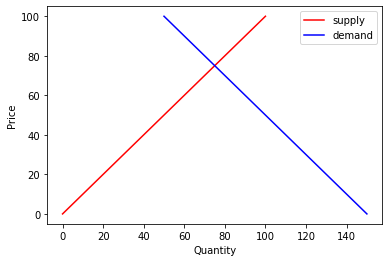

In [40]:
IN.plot()

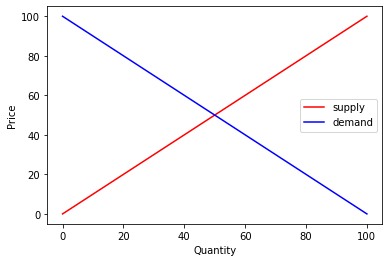

In [41]:
IL.plot()

In [89]:
IL.demand(50)

AttributeError: 'State' object has no attribute 'demand'

In [42]:
print(IN)

In [43]:
print(5)

5


In [17]:
x = [IN, IL]

In [18]:
x

[<__main__.State at 0x1d801f62c70>, <__main__.State at 0x1d801f62b50>]

In [45]:
"%.1f"%(3.14)

'3.1'

In [84]:
class State:

    def __init__(self, name, pop):
        self.name = name
        self.population = pop
        
    #... other attributes and methods go here ....
    
    def __str__(self):
        return "St: %s Pop: %.1f m"%(self.name,self.population)
    
    def __repr__(self):
        return "%s (%.1f m)"%(self.name[:4].upper(),self.population)
    
    def __add__(self,other): 
        print("__add(.)__")
        print(self)
        print(other)
        return self.population+other #6.73 + IL
    
    def __radd__(self,other):  
        print("__radd(.)__")
        print(self)
        print(other)
        return other+self.population #6.73 + 12.67

In [74]:
IN=State('Indiana',6.73)
print(IN)

St: Indiana Pop: 6.7 m


In [75]:
#6.__add__(5)
6 + 5

10

In [85]:
IN = State('Indiana',6.73)
IL = State("Illinois",12.67)

In [86]:
IN

INDI (6.7 m)

In [87]:
IL

ILLI (12.7 m)

In [88]:
#IN.__add__(IL)
IN + IL
#IN.__add__(IL)

__add(.)__
St: Indiana Pop: 6.7 m
St: Illinois Pop: 12.7 m
__radd(.)__
St: Illinois Pop: 12.7 m
6.73


19.4

In [50]:
IN

INDI (6.7 m)

In [80]:
IL = State("Illinois",12.67)
MI = State('Michigan',9.99)

In [81]:
IN+IL

__add(.)__
St: Indiana Pop: 6.7 m
St: Illinois Pop: 12.7 m


19.4

In [82]:
[IN,IL,MI]

[INDI (6.7 m), ILLI (12.7 m), MICH (10.0 m)]

In [83]:
sum([IN,IL,MI])

__radd(.)__
St: Indiana Pop: 6.7 m
0
__radd(.)__
St: Illinois Pop: 12.7 m
6.73
__radd(.)__
St: Michigan Pop: 10.0 m
19.4


29.39

##### Practice Problem

Modify \__add\__ and \__radd\__ so that the sum of state objects results in a new object with population and supply and demand functions aggregated appropriately (e.g., the quantity demanded at a given price is the sum of demand from the state objects that are being added).

In [108]:
class State:

    def __init__(self, name, pop):
        print("Initialize new object with name=",name,"and population=",pop)
        self.name = name
        self.population = pop

        #supply function parameters
        self.supply_intercept=0
        self.supply_slope=1
        
        #demand function parameters
        self.demand_intercept=100
        self.demand_slope=-1
    
    def supply(self, price):
        '''Determine quantity supplied at a given price.'''
        qs = self.supply_intercept + self.supply_slope * price
        return qs
    
    def demand(self,price):
        '''Determine quantity demanded at a given price.'''
        qd = self.demand_intercept + self.demand_slope * price
        return qd
    
    def plot(self):
        '''Plot'''
        p = np.linspace(0,100,11)        
        plt.plot(self.supply(p),p,'-r',label='supply')
        plt.plot(self.demand(p),p,'-b',label='demand')
        plt.xlabel('Quantity')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
        
    def __str__(self):
        return "St: %s Pop: %.1f m"%(self.name,self.population)
    
    def __repr__(self):
        return "%s (%.1f m)"%(self.name[:5].upper(),self.population)
    
    def __add__(self,other): 
        print("__add(.)__")
        print(self)
        print(other)
        combo_name = self.name[:2]+"-"+other.name[:2]
        combo_pop = self.population + other.population
        COMBO = State(combo_name,combo_pop)
        COMBO.supply_intercept = self.supply_intercept + other.supply_intercept
        COMBO.supply_slope = self.supply_slope + other.supply_slope
        COMBO.demand_intercept = self.demand_intercept + other.demand_intercept
        COMBO.demand_slope = self.demand_slope + other.demand_slope
        return COMBO
    
    def __radd__(self,other):  
        print("__radd(.)__")
        print(self)
        print(other)
        return other+self.population

In [109]:
IN = State('Indiana',6.73)
IL = State("Illinois",12.67)

Initialize new object with name= Indiana and population= 6.73
Initialize new object with name= Illinois and population= 12.67


In [110]:
XYZ = IN + IL #IN.__add__(IL)

__add(.)__
St: Indiana Pop: 6.7 m
St: Illinois Pop: 12.7 m
Initialize new object with name= In-Il and population= 19.4


In [ ]:
C = 1 + 1 #1.__add__(1)

In [112]:
C.supply_intercept, C.supply_slope

(0, 2)

In [111]:
C.supply(50)

100

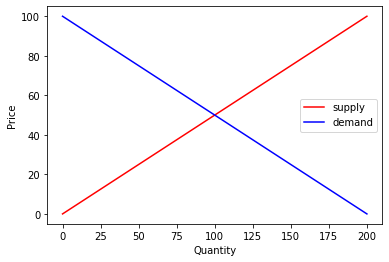

In [115]:
C.plot()

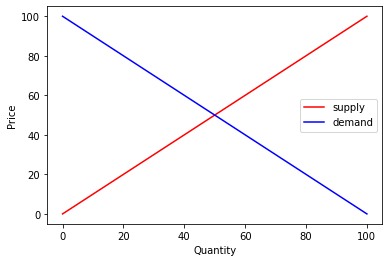

In [116]:
IN.plot()

In [113]:
IN.supply(50)

50

In [114]:
IL.supply(50)

50

# Jupyter Magic Commands

> Jupyter treats any line whose first character is "%" as a special call to a [**magic** command](https://ipython.readthedocs.io/en/stable/interactive/magics.html). 
- **%** is a line magic
- **%%** is a cell magic
    
Magic commands allow you to control behavior of Jupyter itself

In [117]:
%magic

In [118]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

In [119]:
%%file fib_demo.py

def fibRecursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibRecursive(n-1) + fibRecursive(n-2)

def fib_seq(n):
    seq = [ ]
    if n > 0:
        seq.extend(fib_seq(n-1))
    seq.append(fibRecursive(n))
    return seq

print(fib_seq(2))

Writing fib_demo.py


In [120]:
%run fib_demo.py

[0, 1, 1]


<Figure size 432x288 with 0 Axes>

In [ ]:
# %load fib_demo.py

def fibRecursive(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibRecursive(n-1) + fibRecursive(n-2)

def fib_seq(n):
    seq = [ ]
    if n > 0:
        seq.extend(fib_seq(n-1))
    seq.append(fibRecursive(n))
    return seq

print(fib_seq(2))


<a id="timing"></a>
# Timing and Profiling

Understanding how fast your code runs will be very useful throughout this course. There are two main approaches you can take. First you can use **time** library. Second you can use Jupyter itself with a magic **%timeit** function 

In [1]:
import time

In [2]:
from taxes import in_tax #will be used as an example

In [3]:
t1=time.time() #Get the initial time
#--------------------
#run some code
for n in range(1000000):
    in_tax(n)
#--------------------
t2=time.time() #Get time after running your code
print("Took:",str(t2-t1)," seconds")

Took: 0.6607747077941895  seconds


# Practice Question
Write a function called **practice_q** to compare the performance of **in** operator for lists, dictionaries, and arrays. That is, on the x-axis you should have the size of the container (i.e., list, dictionary, array) and on the y-axis you should have the time it takes to check whether an item is in that. 


- **Input**: none
- **Output**: a pdf figure saved to file (submit the figure that you create separately)

*Hint: you will need to create the containers of different sizes*

In [4]:
#STARTING POINT
def measureTime_in(obj,s):
    """measure the time of checking if s is in obj"""
    startTime=time.time()
    if s in obj:
        pass
    endTime=time.time()
    return endTime-startTime

In [11]:
import numpy as np

In [14]:
measureTime_in(list(range(10000000)),1)

0.0

In [18]:
sizes = np.linspace(1000,100000,25)
print(sizes)

[  1000.   5125.   9250.  13375.  17500.  21625.  25750.  29875.  34000.
  38125.  42250.  46375.  50500.  54625.  58750.  62875.  67000.  71125.
  75250.  79375.  83500.  87625.  91750.  95875. 100000.]


In [41]:
def getTimeForMultiple(sizes):
    
    l_times = np.zeros_like(sizes)
    a_times = np.zeros_like(sizes)
    d_times = np.zeros_like(sizes)
    
    for i,s in enumerate(sizes):
        
        l = list(range(s)) #create a list of size=s
        a = np.arange(s) #create an array of size=s
        d = dict.fromkeys(list(range(s)), " ")

        l_times[i]=measureTime_in(l,s)
        a_times[i]=measureTime_in(a,s)
        d_times[i]=measureTime_in(d,s)
        
    return l_times, a_times, d_times

In [50]:
sizes = np.array([1000,100000, 10000000 , 100000000])
results = getTimeForMultiple(sizes)

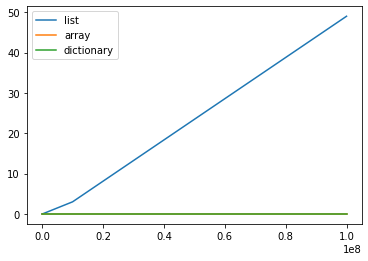

In [53]:
plt.plot(sizes,results[0],label="list")
plt.plot(sizes,results[1],label="array")
plt.plot(sizes,results[2],label="dictionary")
plt.legend()
plt.show()

## Timing with Jupyter 

Jupyter Notebook treats any line whose first character is **%** as a special call to a **magic** functions. Magic function allow you to control behavior of the Notebook itself. There are two types of calls:

- **%** is a line magic (applicable to one line only)
- **%%** is a cell magic (applicable to the whole cell)

In [54]:
%%timeit #the timeit will be applied to the whole cell
#--------------------
#run some code
for n in range(1000000):
    in_tax(n)
#--------------------

400 ms ± 35.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Profiling with Jupyter

The following four commands are not bundled with Jupyter, so you will need to get the **line_profiler** and **memory_profiler** extensions.


- %prun: Run code with the profiler
- %lprun: Run code with the line-by-line profiler
- %memit: Measure the memory use of a single statement
- %mprun: Run code with the line-by-line memory profiler

To install **line_profiler**, either use Anaconda Navigator, or pip/conda:

- pip install line_profiler
- conda install line_profiler

Next, load the line_profiler extension: **%load_ext line_profiler**

To install **memory_profiler**, again either use Anaconda Navigator, or pip/conda

- pip install memory_profiler
- conda install memory_profiler

Next, load the memory_profiler extension: **%load_ext memory_profiler**

In [56]:
%load_ext line_profiler

In [57]:
def test():
    for n in range(1000000):
        in_tax(n)
        in_tax(n//2)

In [59]:
%prun test()

In [61]:
%load_ext memory_profiler

In [62]:
%memit test()

peak memory: 124.41 MiB, increment: 0.33 MiB
